In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/var/folders/3m/l0tyzx5j5lg1wtczpcc3ff8h0000gn/T/ipykernel_99580/3993962526.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('alopecia-areata-subsample/PAYERS/data_000000000000.csv',  delimiter="|")

In [3]:
data.shape

(139, 8)

Small dataset with 139 rows !

In [4]:
data.head()

,PATIENT_ID,ENCOUNTER_ID,PY_TYPE_LEVEL1,PY_PRIMARY,DATA_SUPPLIER_ID,PRODUCT_NAME,PRODUCT_VERSION,EXPORT_DATE
0,9E62A2DC-8195-4E37-BBE4-D0D68274E40B,5D91E1B2-13DD-46DE-B0FA-D4AA7AC60351,MEDICAID,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
1,9E62A2DC-8195-4E37-BBE4-D0D68274E40B,6D913B76-D53E-4BE5-AAC1-CD790830C75C,MEDICAID,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
2,9E62A2DC-8195-4E37-BBE4-D0D68274E40B,37AC8A47-9B7C-49F6-98B6-FB83B85B5903,MEDICAID,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
3,9E62A2DC-8195-4E37-BBE4-D0D68274E40B,0BD3C811-41DE-44F9-9389-35100B70E283,MEDICAID,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
4,9E62A2DC-8195-4E37-BBE4-D0D68274E40B,C2841BC1-595D-4347-9F4B-AFB2A880129F,MEDICAID,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213


In [5]:
data.tail()

,PATIENT_ID,ENCOUNTER_ID,PY_TYPE_LEVEL1,PY_PRIMARY,DATA_SUPPLIER_ID,PRODUCT_NAME,PRODUCT_VERSION,EXPORT_DATE
134,B4BC14C0-2975-457F-8ED5-C6A7E942A5B8,0D06CF1C-53C9-4640-A19B-428FD64D19AA,PRIVATE HEALTH INSURANCE,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
135,B4BC14C0-2975-457F-8ED5-C6A7E942A5B8,4CEA3383-91F3-4337-B326-5C45BDFE5042,PRIVATE HEALTH INSURANCE,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
136,B4BC14C0-2975-457F-8ED5-C6A7E942A5B8,8C5959D4-9932-47EE-AF4B-AE507006A316,PRIVATE HEALTH INSURANCE,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
137,B4BC14C0-2975-457F-8ED5-C6A7E942A5B8,EE2165ED-5D78-44EC-816F-B77A9D6AF734,PRIVATE HEALTH INSURANCE,YES,9688,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213
138,C59CB36F-3647-4F10-BAF4-74390CC6FE0D,EBA8E224-E399-4186-9968-3C47E63D2148,PRIVATE HEALTH INSURANCE,YES,2206,ALOPECIA_AREATA_SUBSAMPLE_PAYERS,5.0,20231213


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PATIENT_ID        139 non-null    object 
 1   ENCOUNTER_ID      139 non-null    object 
 2   PY_TYPE_LEVEL1    139 non-null    object 
 3   PY_PRIMARY        139 non-null    object 
 4   DATA_SUPPLIER_ID  139 non-null    int64  
 5   PRODUCT_NAME      139 non-null    object 
 6   PRODUCT_VERSION   139 non-null    float64
 7   EXPORT_DATE       139 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 8.8+ KB


## Checking for Duplication

In [7]:
data.nunique()

PATIENT_ID            6
ENCOUNTER_ID        137
PY_TYPE_LEVEL1        3
PY_PRIMARY            2
DATA_SUPPLIER_ID      2
PRODUCT_NAME          1
PRODUCT_VERSION       1
EXPORT_DATE           1
dtype: int64

In [8]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PATIENT_ID, ENCOUNTER_ID, PY_TYPE_LEVEL1, PY_PRIMARY, DATA_SUPPLIER_ID, PRODUCT_NAME, PRODUCT_VERSION, EXPORT_DATE]
Index: []


No duplicate rows found in the dataset

## Checking Missing Values 

In [9]:
data.isnull().sum()

PATIENT_ID          0
ENCOUNTER_ID        0
PY_TYPE_LEVEL1      0
PY_PRIMARY          0
DATA_SUPPLIER_ID    0
PRODUCT_NAME        0
PRODUCT_VERSION     0
EXPORT_DATE         0
dtype: int64

<Axes: >

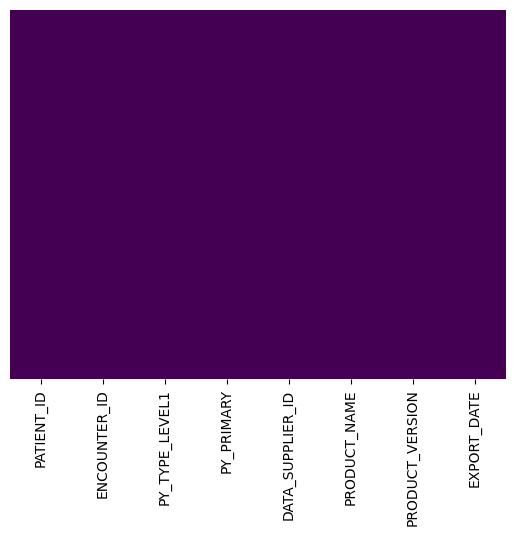

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NO NULL VALUES 

## Checking for inconsistent data types

In [11]:
data_types = data.dtypes
print(data_types)

PATIENT_ID           object
ENCOUNTER_ID         object
PY_TYPE_LEVEL1       object
PY_PRIMARY           object
DATA_SUPPLIER_ID      int64
PRODUCT_NAME         object
PRODUCT_VERSION     float64
EXPORT_DATE           int64
dtype: object


It is better to  convert the values from the columns that contains the values ‘YES’ and ‘NO’ with TRUE and FALSE / 0 or 1